# **GRIP - THE SPARKS FOUNDATION**

**Data Science & Business Analytics Internship**

# **Task 2 - Prediction using Unsupervised ML**

To predict the optimum number of clusters and represent it visually from the given "Iris" dataset.

**Import the required libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

**Loading the Iris Dataset**

In [5]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Finding the optimum number of clusters for k-means classification**

In [7]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
pd.DataFrame({"Number of Clusters":range(1,11),"WCSS":wcss})

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Number of Clusters,WCSS
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.228473
4,5,46.472230
5,6,39.039987
6,7,34.299712
7,8,30.063111
8,9,28.271722
9,10,26.094325


**Plotting the results onto a line graph**

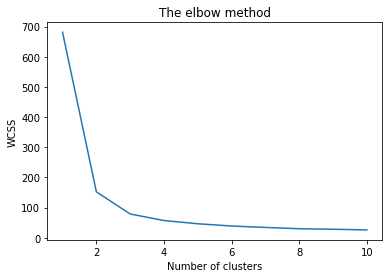

In [8]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From this we choose the number of clusters as ** '3**'.

**Applying kmeans to the dataset / Creating the kmeans classifier**

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

**Visualising the clusters - On the first two columns**

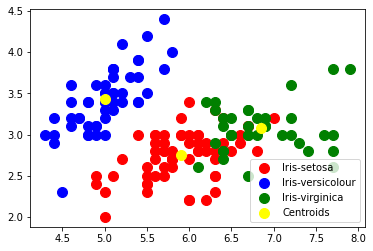

In [10]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**Visualizing the clusters- On the first three columns**

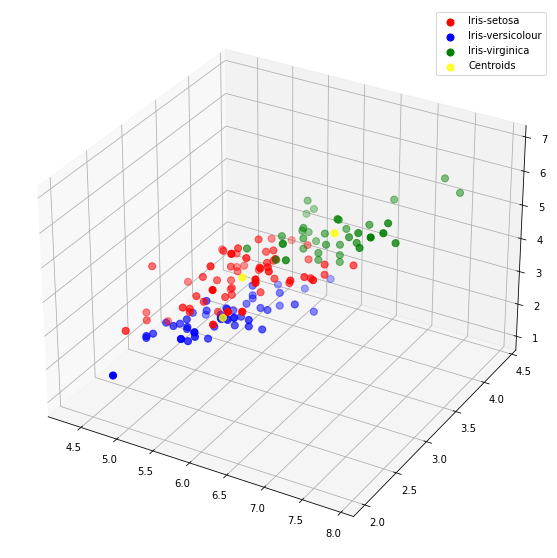

In [11]:
plt.figure(figsize=[10,10])
ax = plt.axes(projection ="3d")
ax.scatter3D(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], 
             s = 50, c = "red", label = 'Iris-setosa')
ax.scatter3D(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], 
             s = 50, c = 'blue', label = 'Iris-versicolour')
ax.scatter3D(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], 
             s = 50, c = 'green', label = 'Iris-virginica')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2],
            s = 50, c = 'yellow', label = 'Centroids', alpha = 0.8)

plt.legend()
plt.show()

# Thank You